In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
import os
from pprint import pprint

The following blocks set up the frame for the animation and declares the functions that the animation uses.

In [4]:
rc('animation', html='html5')

In [5]:
img = np.ones((400, 200, 3))

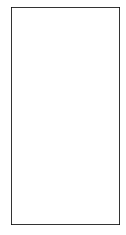

In [6]:
fig, ax = plt.subplots()
plt.xticks([], [])
plt.yticks([], [])
line = plt.imshow(img)

In [7]:
def init():
    line.set_data(np.ones((400, 200, 3)))
    return (line,)

In [8]:
def animate(i):
    img = game[i]
    line.set_data(img)
    return(line,)

Using tensorboard we can examine the logs of the training

In [3]:
%load_ext tensorboard

In [5]:
# This block may time out the first time it is run, in which case just run it again.
%tensorboard --logdir="logs"

Reusing TensorBoard on port 6006 (pid 15560), started 0:00:11 ago. (Use '!kill 15560' to kill it.)

Here we look at all the saved episodes and record their steps, so we can watch the best ones.

In [136]:
dic = {}
for ep in os.listdir('good_games'):
    file = f'good_games/{ep}'
    if os.path.exists(file):
        game = np.load(file)
        game = game['arr_0']
    else:
        continue
    i = len(game)
    dic.update( {ep : i} )

In [118]:
def anim_episode(episode):
    file = f'good_games/tetris-{episode}.npz'
    game = np.load(file)
    game = game['arr_0']

    frames = len(game)
    if frames > 10000: # If the game is over 10000 frames we only render the first 10000
        game = game[:10000]
        frames = 10000

    anim = animation.FuncAnimation(fig, animate, init_func=init, frames=frames, interval=20, blit=True)
    return game, anim

Now we can look at a few diffrent games throughout the traning.

First lets look at the first episode.

In [119]:
game, anim = anim_episode(0)

In [120]:
anim

Completely random as we would expect, doesn't even clear a single line.

Now let's look at slightly better game

In [121]:
game, anim = anim_episode(1124)

In [122]:
anim

Still not great but we can see that it's starting to learn and if we look at a game a bit later

In [130]:
game, anim = anim_episode(1409)

Rendering the animation may take a few minutes.

In [131]:
anim

We can see this is much better

Now lets look at the best game

In [145]:
list(dic.keys())[list(dic.values()).index(max(dic.values()))]

'tetris-1532.npz'

In [128]:
game, anim = anim_episode(1532)

Rendering the animation may take a few minutes.

In [129]:
anim